# Importação das bibliotecas e carregamento dos dados

In [1]:
# Importação de Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelo de Regressão Linear Múltipla

In [2]:
# Carregando o dataset

dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [4]:
# Construção do Modelo de Regressão Linear Múltipla

from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()

In [5]:
# Treinamento do Modelo de Regressão Linear Múltipla

regressor_linear.fit(X_train, y_train)

LinearRegression()

In [6]:
# Previsão do Modelo de Regressão Linera Múltipla nos dados de teste

previsoes_regressor_linear = regressor_linear.predict(X_test)

In [7]:
# Resultados do Modelo de Regressão Linear Múltipla

np.set_printoptions(precision=2)
print(np.concatenate((previsoes_regressor_linear.reshape(len(previsoes_regressor_linear),1), y_test.reshape(len(y_test),1)), 1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


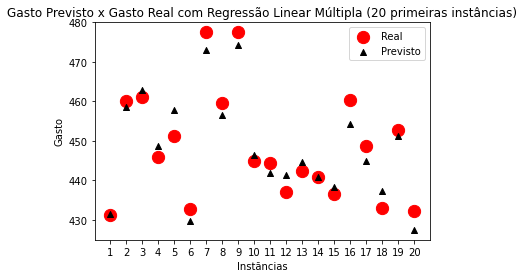

In [8]:
# Visualização dos Resultados do Modelo de Regressão Linear Múltipla

tamanho = 20
plt.scatter(range(1, tamanho+1), y_test[0:tamanho], s=150, color='red', label='Real')
plt.scatter(range(1, tamanho+1), previsoes_regressor_linear[0:tamanho], color='black', marker='^', label='Previsto')
plt.title('Gasto Previsto x Gasto Real com Regressão Linear Múltipla ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(1, tamanho+1))
plt.ylabel('Gasto')
plt.legend()
plt.show()

In [9]:
# Avaliação do Modelo

from sklearn.metrics import r2_score
r2_score(y_test, previsoes_regressor_linear)

0.9325315554761303

# Modelo de Regressão Polinomial

In [10]:
# Carregando o dataset

dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [11]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [12]:
# Construção do Modelo de Regressão Polinomial

from sklearn.preprocessing import PolynomialFeatures
poli = PolynomialFeatures(degree=4)

In [13]:
# Treinamento do Modelo de Regressão Polinomial

X_poli = poli.fit_transform(X_train)
regressor_poli = LinearRegression()
regressor_poli.fit(X_poli, y_train)

LinearRegression()

In [14]:
# Previsão do Modelo de Regressão Polinomial nos dados de teste

previsoes_regressor_poli = regressor_poli.predict(poli.transform(X_test))

In [15]:
# Resultados do Modelo de Regressão Polinomial

np.set_printoptions(precision=2)
print(np.concatenate((previsoes_regressor_poli.reshape(len(previsoes_regressor_poli),1), y_test.reshape(len(y_test),1)), 1))

[[433.94 431.23]
 [457.9  460.01]
 [460.53 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


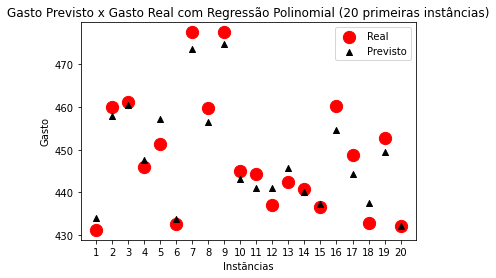

In [16]:
# Visualização dos Resultados do Modelo de Regressão Polinomial

tamanho = 20
plt.scatter(range(1, tamanho+1), y_test[0:tamanho], s=150, color='red', label='Real')
plt.scatter(range(1, tamanho+1), previsoes_regressor_poli[0:tamanho], color='black', marker='^', label='Previsto')
plt.title('Gasto Previsto x Gasto Real com Regressão Polinomial ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(1, tamanho+1))
plt.ylabel('Gasto')
plt.legend()
plt.show()

In [17]:
# Avaliação do Modelo de Regressão Polinomial

from sklearn.metrics import r2_score
r2_score(y_test, previsoes_regressor_poli)

0.9458194218967585

# Modelo SVR

In [18]:
# Carregando o dataset

dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

y = y.reshape(len(y), 1)

In [19]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [20]:
# Dimensionsamento de recursos

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [21]:
# Construção do Modelo SVR

from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [22]:
# Treinamento do Modelo SVR

svr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [23]:
# Previsão do Modelo SVR

previsoes_svr = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)))

In [24]:
# Resultados do Modelo SVR

np.set_printoptions(precision=2)
print(np.concatenate((previsoes_svr.reshape(len(previsoes_svr),1), y_test.reshape(len(y_test),1)), 1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


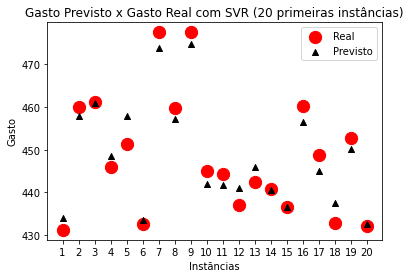

In [25]:
# Visualização dos Resultados do Modelo SVR

tamanho = 20
plt.scatter(range(1, tamanho+1), y_test[0:tamanho], s=150, color='red', label='Real')
plt.scatter(range(1, tamanho+1), previsoes_svr[0:tamanho], color='black', marker='^', label='Previsto')
plt.title('Gasto Previsto x Gasto Real com SVR ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(1, tamanho+1))
plt.ylabel('Gasto')
plt.legend()
plt.show()

In [26]:
# Avaliação do Modelo de SVR

from sklearn.metrics import r2_score
r2_score(y_test, previsoes_svr)

0.9480784049986258

# Modelo de Árvore de Decisão

In [27]:
# Carregando o dataset

dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [28]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [29]:
# Construção da Arvore de Decisão

from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor(random_state=0)

In [30]:
# Treinamento da Árvore de Decisão

regressor_arvore.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
# Previsão do Modelo de Árvore de Decisão

previsoes_arvore = regressor_arvore.predict(X_test)

In [32]:
# Resultados do Modelo de Árvore de Decisão

np.set_printoptions(precision=2)
print(np.concatenate((previsoes_arvore.reshape(len(previsoes_arvore),1), y_test.reshape(len(y_test),1)), 1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


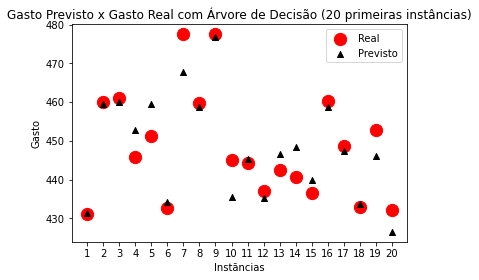

In [33]:
# Visualização dos Resultados do Modelo de Árvore de Decisão

tamanho = 20
plt.scatter(range(1, tamanho+1), y_test[0:tamanho], s=150, color='red', label='Real')
plt.scatter(range(1, tamanho+1), previsoes_arvore[0:tamanho], color='black', marker='^', label='Previsto')
plt.title('Gasto Previsto x Gasto Real com Árvore de Decisão ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(1, tamanho+1))
plt.ylabel('Gasto')
plt.legend()
plt.show()

In [34]:
# Avaliação do Modelo de Árvore de Decisão

from sklearn.metrics import r2_score
r2_score(y_test, previsoes_arvore)

0.922905874177941

# Modelo Random Forest

In [35]:
# Carregando o dataset

dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [36]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [37]:
# Construção do Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_random = RandomForestRegressor(n_estimators=10, random_state=0)

In [38]:
# Treinamento do Random Forest

regressor_random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [39]:
# Previsão do Modelo Random Forest

previsoes_random = regressor_random.predict(X_test)

In [40]:
# Resultados do Modelo Random Forest

np.set_printoptions(precision=2)
print(np.concatenate((previsoes_random.reshape(len(previsoes_random),1), y_test.reshape(len(y_test),1)), 1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


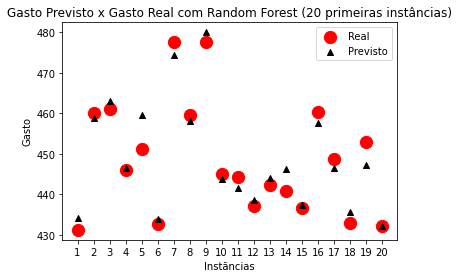

In [41]:
# Visualização dos Resultados do Modelo de Árvore de Decisão

tamanho = 20
plt.scatter(range(1, tamanho+1), y_test[0:tamanho], s=150, color='red', label='Real')
plt.scatter(range(1, tamanho+1), previsoes_random[0:tamanho], color='black', marker='^', label='Previsto')
plt.title('Gasto Previsto x Gasto Real com Random Forest ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(1, tamanho+1))
plt.ylabel('Gasto')
plt.legend()
plt.show()

In [42]:
# Avaliação do Modelo de Árvore de Decisão

from sklearn.metrics import r2_score
r2_score(y_test, previsoes_random)

0.9615908334363876

# Avaliação Geral

In [43]:
scores = {}

In [44]:
scores['Regressão Linear Múltipla'] = r2_score(y_test, previsoes_regressor_linear)

In [45]:
scores['Regressão Polinomial'] = r2_score(y_test, previsoes_regressor_poli)

In [46]:
scores['SVR'] = r2_score(y_test, previsoes_svr)

In [47]:
scores['Árvore de Decisão'] = r2_score(y_test, previsoes_arvore)

In [48]:
scores['Random Forest'] = r2_score(y_test, previsoes_random)

In [49]:
scores

{'Regressão Linear Múltipla': 0.9325315554761303,
 'Regressão Polinomial': 0.9458194218967585,
 'SVR': 0.9480784049986258,
 'Árvore de Decisão': 0.922905874177941,
 'Random Forest': 0.9615908334363876}

In [50]:
df_scores = pd.DataFrame.from_dict(scores, orient='index').reset_index()
df_scores.columns=['Modelo','Score']

In [51]:
df_scores

,Modelo,Score
0,Regressão Linear Múltipla,0.932532
1,Regressão Polinomial,0.945819
2,SVR,0.948078
3,Árvore de Decisão,0.922906
4,Random Forest,0.961591


In [52]:
grafico = df_scores.set_index('Modelo').sort_values(by='Score',ascending=False)

<AxesSubplot:xlabel='Modelo'>

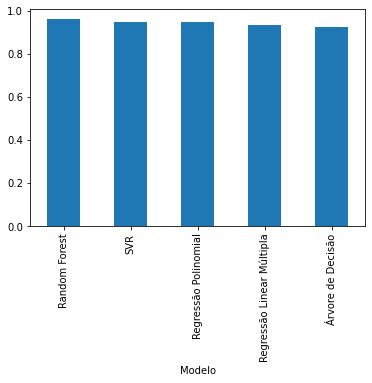

In [53]:
grafico.plot(kind='bar', legend=False)

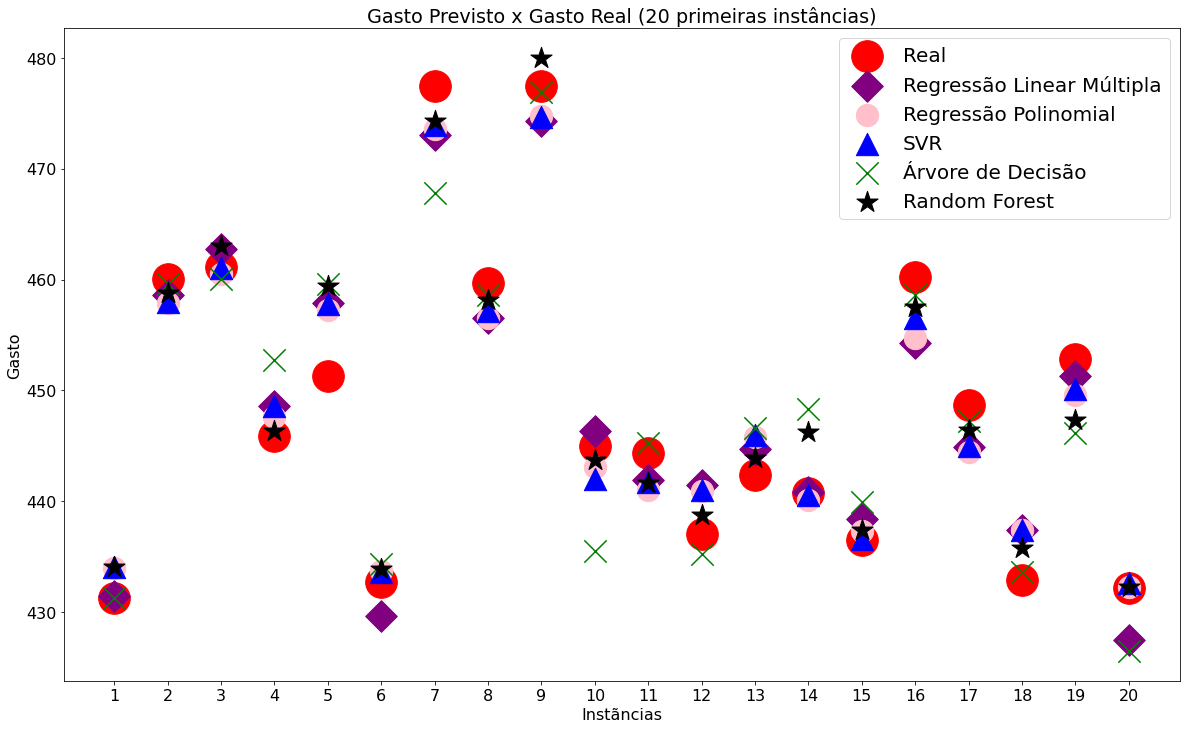

In [54]:
# Visualização dos Resultados dos Modelos

tamanho = 20
plt.rcParams['figure.figsize'] = (20,12)
plt.rcParams['font.size'] = 16
#plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['ytick.labelsize'] = 16
#plt.rcParams['axes.labelsize'] = 20
plt.scatter(range(1, tamanho+1), y_test[0:tamanho], s=1000, color='red', label='Real')
plt.scatter(range(1, tamanho+1), previsoes_regressor_linear[0:tamanho], color='purple', marker='D', label='Regressão Linear Múltipla', s=500)
plt.scatter(range(1, tamanho+1), previsoes_regressor_poli[0:tamanho], color='pink', marker='o', label='Regressão Polinomial', s= 500)
plt.scatter(range(1, tamanho+1), previsoes_svr[0:tamanho], color='blue', marker='^', label='SVR', s= 500)
plt.scatter(range(1, tamanho+1), previsoes_arvore[0:tamanho], color='green', marker='x', label='Árvore de Decisão', s=500)
plt.scatter(range(1, tamanho+1), previsoes_random[0:tamanho], color='black', marker='*', label='Random Forest', s=500)
plt.title('Gasto Previsto x Gasto Real ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(1, tamanho+1))
plt.ylabel('Gasto')
plt.legend(prop={'size': 20})
plt.show()